In [13]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/files/prodigy/Mall_Customers.csv')

# Display the first few rows of the dataset
print(df.head())

# Check for any missing values
print(df.isnull().sum())

# Fill or drop missing values as needed (here we drop them)
#df = df.dropna()

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [5]:
df.shape

(200, 5)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

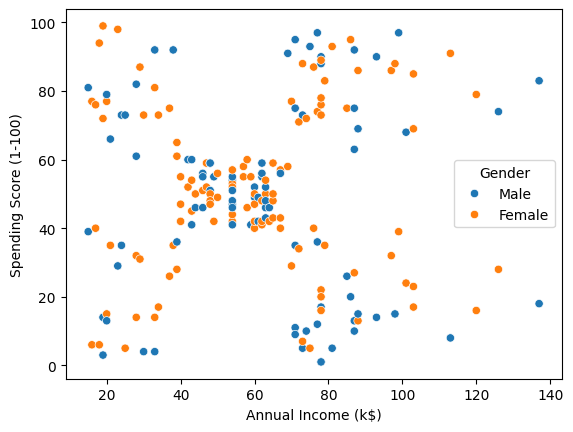

In [6]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')

<Axes: xlabel='Annual Income (k$)', ylabel='Age'>

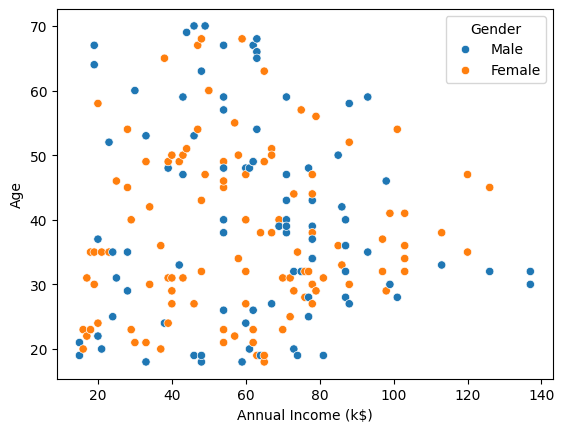

In [7]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Age', hue='Gender')

<Axes: xlabel='Gender', ylabel='count'>

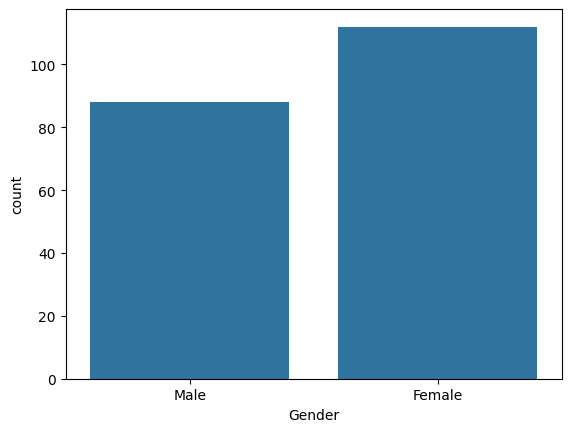

In [8]:
sns.countplot(data=df, x="Gender")

In [16]:
laencoder = LabelEncoder()
df['Gender'] = laencoder.fit_transform(df['Gender'])

In [17]:
x=df.drop(['CustomerID'],axis=1)
scaler=StandardScaler()
xt=scaler.fit_transform(x)

In [25]:
print(xt)

[[ 1.12815215 -1.42456879 -1.73899919 -0.43480148]
 [ 1.12815215 -1.28103541 -1.73899919  1.19570407]
 [-0.88640526 -1.3528021  -1.70082976 -1.71591298]
 [-0.88640526 -1.13750203 -1.70082976  1.04041783]
 [-0.88640526 -0.56336851 -1.66266033 -0.39597992]
 [-0.88640526 -1.20926872 -1.66266033  1.00159627]
 [-0.88640526 -0.27630176 -1.62449091 -1.71591298]
 [-0.88640526 -1.13750203 -1.62449091  1.70038436]
 [ 1.12815215  1.80493225 -1.58632148 -1.83237767]
 [-0.88640526 -0.6351352  -1.58632148  0.84631002]
 [ 1.12815215  2.02023231 -1.58632148 -1.4053405 ]
 [-0.88640526 -0.27630176 -1.58632148  1.89449216]
 [-0.88640526  1.37433211 -1.54815205 -1.36651894]
 [-0.88640526 -1.06573534 -1.54815205  1.04041783]
 [ 1.12815215 -0.13276838 -1.54815205 -1.44416206]
 [ 1.12815215 -1.20926872 -1.54815205  1.11806095]
 [-0.88640526 -0.27630176 -1.50998262 -0.59008772]
 [ 1.12815215 -1.3528021  -1.50998262  0.61338066]
 [ 1.12815215  0.94373197 -1.43364376 -0.82301709]
 [-0.88640526 -0.27630176 -1.43

K MEANS:

1.Using Gender and Spending Score


In [18]:
xt1 = xt[:,[0,3]]
wcss_1 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(xt1)
    wcss_1.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

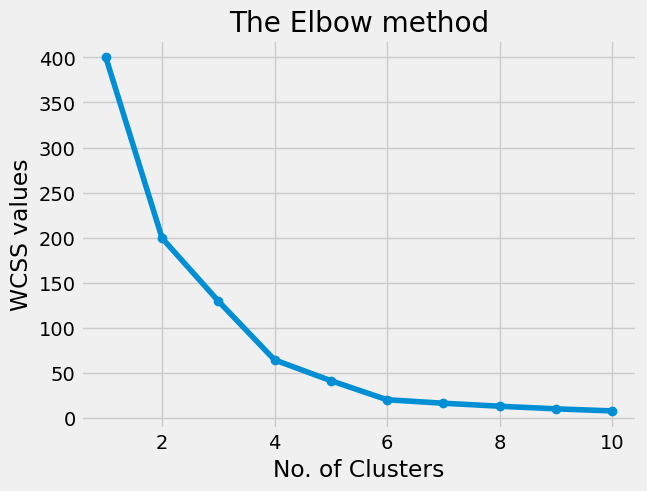

In [19]:
plt.plot(range(1,11), wcss_1, marker='o')
plt.title("The Elbow method")
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS values")
plt.show()

In [20]:
kmeans_1 = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_pred = kmeans_1.fit_predict(xt1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [21]:
centroid=kmeans_1.cluster_centers_
centroid

array([[ 1.12815215, -1.18839648],
       [-0.88640526,  1.03764486],
       [ 1.12815215,  0.64141845],
       [-0.88640526, -0.54017429]])

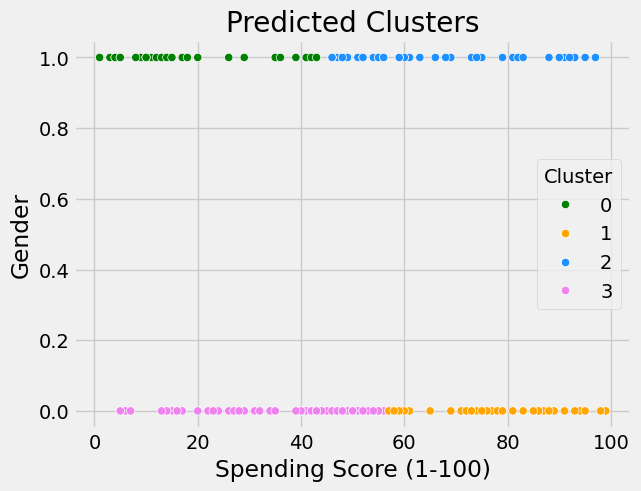

In [27]:
df["Cluster"] = y_pred
sns.scatterplot(x="Spending Score (1-100)",y= "Gender", data = df, hue="Cluster", palette=['green','orange','dodgerblue','violet'], legend='full')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Gender')
plt.title('Predicted Clusters')
plt.show()


(2)Using Age and Spending Score

In [28]:
xt2=xt[:,[1,3]]
wcss_2 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(xt2)
    wcss_2.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

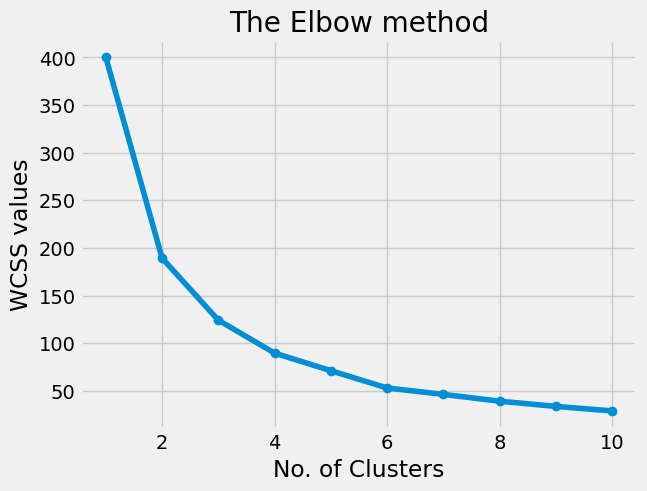

In [29]:
plt.plot(range(1,11), wcss_2, marker='o')
plt.title("The Elbow method")
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS values")
plt.show()

In [30]:
kmeans_2 = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
yt2= kmeans_2.fit_predict(xt2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [31]:
centroid=kmeans_2.cluster_centers_
centroid

array([[-0.8346466 , -0.39442706],
       [ 1.22927178, -0.06558366],
       [-0.61415725,  1.14971545],
       [ 0.62833625, -1.36651894]])

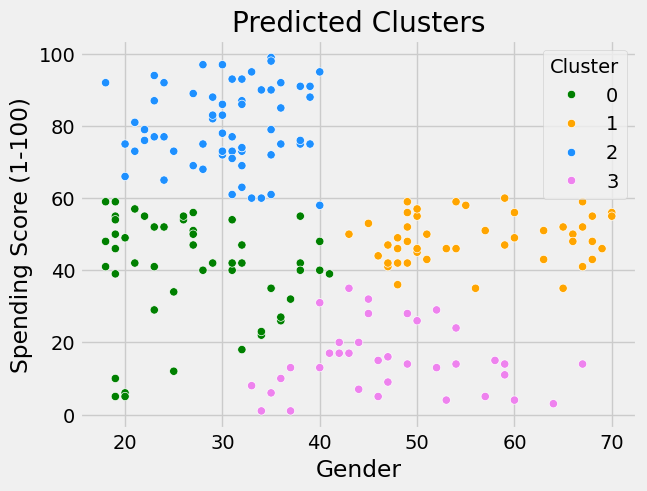

In [32]:
df["Cluster"] = yt2
sns.scatterplot(x="Age",y= "Spending Score (1-100)", data = df, hue="Cluster", palette=['green','orange','dodgerblue','violet'], legend='full')
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.title('Predicted Clusters')
plt.show()

(3)Using Annual Income and Spending Score

In [33]:
xt3 = xt[:,[2,3]]
wcss_3 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(xt)
    wcss_3.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

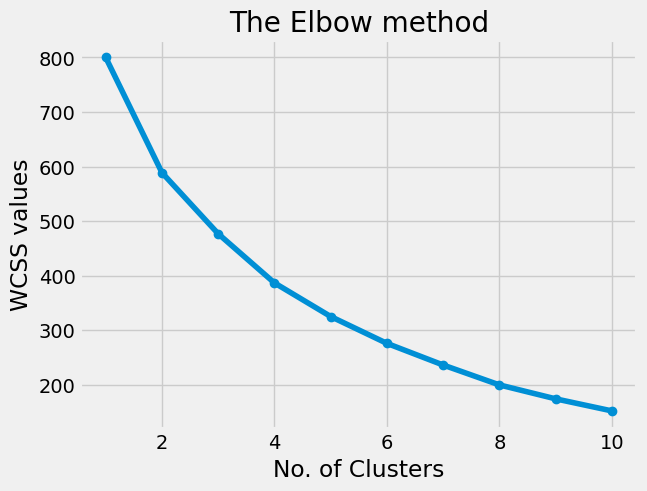

In [34]:
plt.plot(range(1,11), wcss_3, marker='o')
plt.title("The Elbow method")
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS values")
plt.show()

In [35]:
kmeans_3 = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
yt3= kmeans_3.fit_predict(xt3)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [36]:
centroid=kmeans_3.cluster_centers_
centroid

array([[-1.30751869, -1.13696536],
       [ 0.99158305,  1.23950275],
       [ 1.00919971, -1.22553537],
       [-0.46948398,  0.2437994 ]])

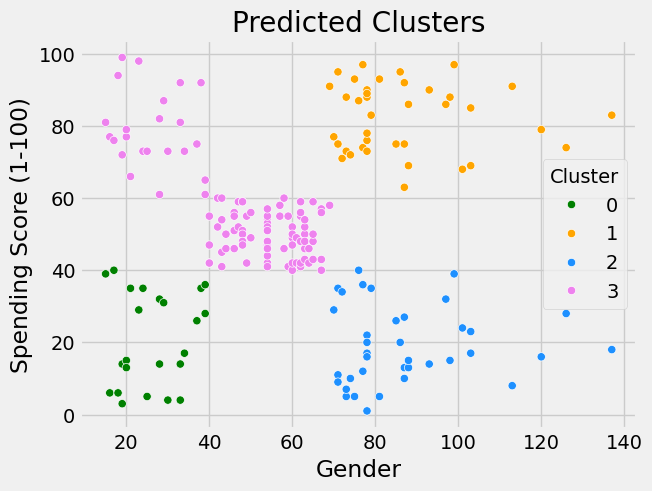

In [37]:
df["Cluster"] = yt3
sns.scatterplot(x="Annual Income (k$)",y= "Spending Score (1-100)", data = df, hue="Cluster", palette=['green','orange','dodgerblue','violet'], legend='full')
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.title('Predicted Clusters')
plt.show()